In [ ]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Conv2D, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
 # Load the data
 cifar10 = tf.keras.datasets.cifar10

 (x_train, y_train), (x_test, y_test) = cifar10.load_data()
 print(x_train.shape, y_train.shape)

170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1)


In [ ]:
# Normalize the data

x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

print(f"x_train.shape: {x_train.shape}")
print(f"y_train.shape: {y_train.shape}")

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [ ]:
# Number of Classes
K = len(set(y_test))
print(f"Number of classes {K}")

Number of classes 10


In [ ]:
# Build the model
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

## To get better results we're gonna use (Conv + Batch Normalization + Pooling) instead of Strided Conv
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
#
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
#
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)


model = Model(i, x)

In [ ]:
# Compile and Fit
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 29s 9ms/step - loss: 1.3596 - accuracy: 0.5332 - val_loss: 1.3442 - val_accuracy: 0.5408
Epoch 2/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9127 - accuracy: 0.6821 - val_loss: 0.8676 - val_accuracy: 0.6963
Epoch 3/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7548 - accuracy: 0.7391 - val_loss: 0.7139 - val_accuracy: 0.7547
Epoch 4/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6456 - accuracy: 0.7782 - val_loss: 0.7846 - val_accuracy: 0.7332
Epoch 5/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5714 - accuracy: 0.8031 - val_loss: 0.6580 - val_accuracy: 0.7785
Epoch 6/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4938 - accuracy: 0.8304 - val_loss: 0.6590 - val_accuracy: 0.7828
Epoch 7/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4388 - accuracy: 0.8492 - val_loss: 0.5865 - val_ac

In [ ]:
# Data Augmentation
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 43s 25ms/step - loss: 1.4494 - accuracy: 0.4980 - val_loss: 1.1665 - val_accuracy: 0.6123
Epoch 2/50
1562/1562 [==============================] - 38s 24ms/step - loss: 1.0044 - accuracy: 0.6517 - val_loss: 0.8120 - val_accuracy: 0.7168
Epoch 3/50
1562/1562 [==============================] - 38s 24ms/step - loss: 0.8500 - accuracy: 0.7086 - val_loss: 0.8535 - val_accuracy: 0.7168
Epoch 4/50
1562/1562 [==============================] - 38s 24ms/step - loss: 0.7593 - accuracy: 0.7405 - val_loss: 0.7444 - val_accuracy: 0.7438
Epoch 5/50
1562/1562 [==============================] - 39s 25ms/step - loss: 0.6871 - accuracy: 0.7653 - val_loss: 0.7085 - val_accuracy: 0.7706
Epoch 6/50
1562/1562 [==============================] - 38s 24ms/step - loss: 0.6420 - accuracy: 0.7820 - val_loss: 0.6423 - val_accuracy: 0.7905
Epoch 7/50
1562/1562 [==============================] - 38s 24ms/step - loss: 0.5935 - accuracy: 0.7982 - val_loss: 0.6386 -

In [ ]:
# Predict
p_test = model.predict(x_test).argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


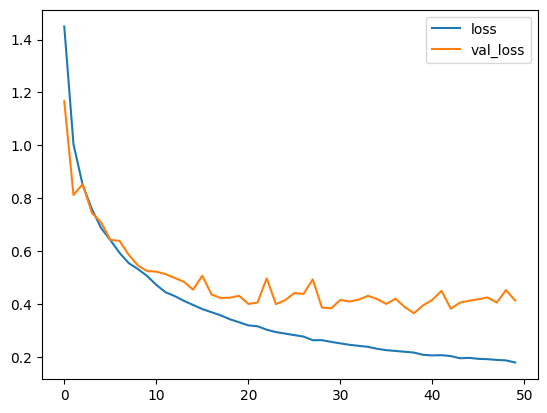

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

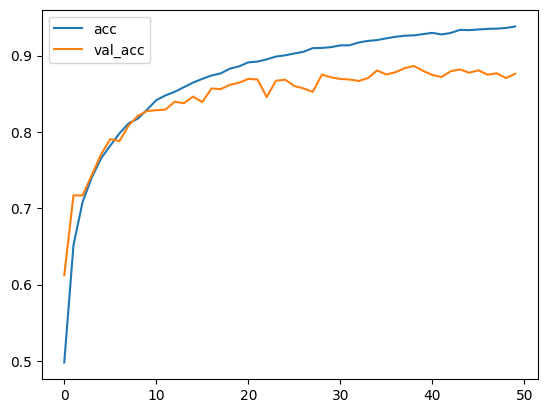

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[897  20  11   7   4   0   0   2  24  35]
 [  1 972   1   0   0   0   1   0   2  23]
 [ 47   5 804  36  23  23  32  10   6  14]
 [ 13   8  30 761  25  85  32  18  14  14]
 [  9   4  31  37 852  24  29   9   3   2]
 [  7   6  21 100  20 819   6   9   4   8]
 [  7   4  21  40  10   8 900   2   5   3]
 [  7   2  11  20  26  18   6 901   4   5]
 [ 25  15   2   2   2   0   1   2 931  20]
 [  7  58   1   1   0   1   1   0   7 924]]


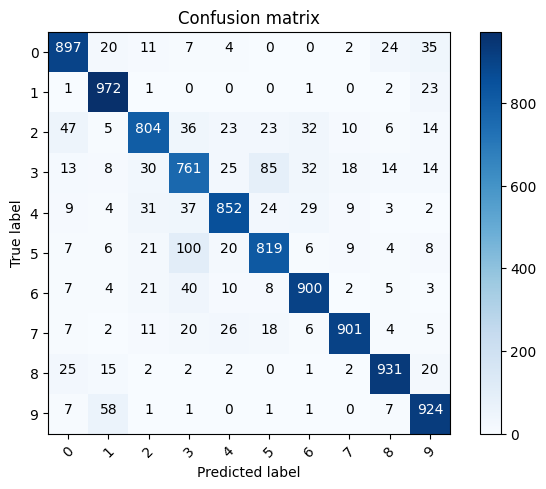

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

In [ ]:
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

Text(0.5, 1.0, 'Predicted 7(horse), Val 5(dog)')

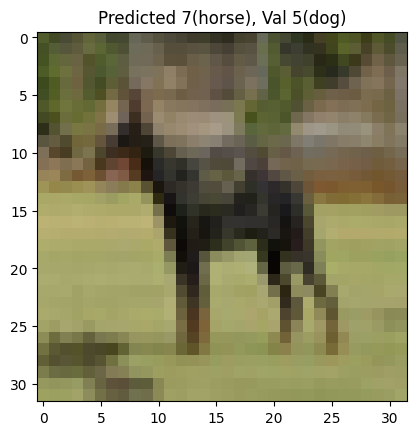

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title(f"Predicted {p_test[i]}({labels[p_test[i]]}), Val {y_test[i]}({labels[y_test[i]]})")

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0   